In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.impute import SimpleImputer
sns.set()

In [2]:
df=pd.read_csv("user_courses_review_test_set.csv")
df.head(10)

,course_name,lecture_name,review_rating,review_comment
0,Advanced Microsoft Excel,F1 to F12 - Using Excel's Function Keys,5,perfect
1,Agile and Scrum Project Management,Agile vs Waterfall - Conclusions,1,The SCRUM chapter are full of errors
2,AI Applications for Business Success,Correlation vs. Causation,3,Bad quality of audio and narrative
3,AI Applications for Business Success,Correlation vs. Causation,3,I need documentation about lecture.
4,Building a 3-Statement Model in Excel,Calculating Cash Flows and Completing the Mode...,5,Great course! Ned has a talent for explaining ...
5,Convolutional Neural Networks with TensorFlow ...,Dimensions,5,It's really easy to follow and useful!!!
6,Convolutional Neural Networks with TensorFlow ...,Data augmentation,5,"Excellent, very easy and simple explanations!"
7,Corporate Strategy,SWOT analysis in practice - analyzing Starbucks,5,"Excellent, exceeded my expectations!"
8,Customer Analytics in Python,Standardizing Segmentation Data,5,I think it's goods
9,Data Analysis with Excel Pivot Tables,Creating an output structure of the FMCG model,5,amazing


In [3]:
df1=pd.read_csv("1.04.+Real-life+example.csv")
df1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df1.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
df1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data=df1.drop(['Model'],axis=1)

In [7]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

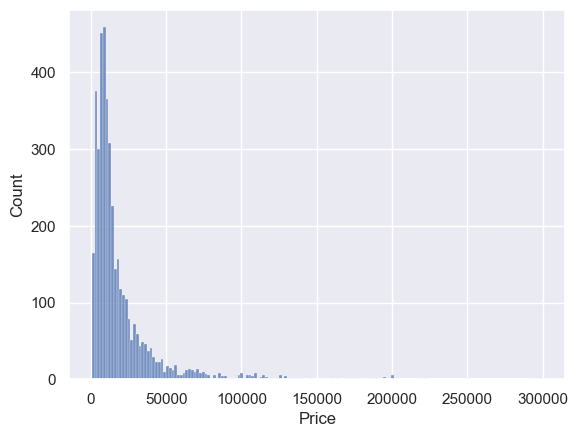

In [9]:
sns.histplot(data['Price'])

In [10]:
q=data['Price'].quantile(0.99)
data1=data[data['Price']<q]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4131,4131.000000,4131,4131.000000,3983.000000,4131,4131,4131.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,908,NaN,1597,NaN,NaN,1895,3737,NaN
mean,NaN,17736.684812,NaN,165.622125,2.743204,NaN,NaN,2006.281288
std,NaN,18862.421137,NaN,104.213992,4.956550,NaN,NaN,6.663535
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,93.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Mileage', ylabel='Count'>

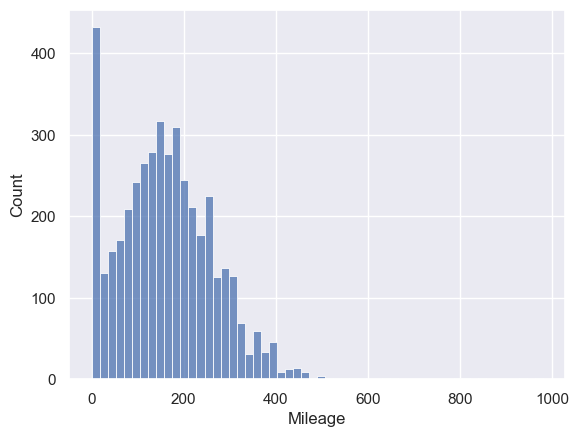

In [11]:
sns.histplot(data['Mileage'])
#Here there are a lot of outliers due to which abnormality is there in the graph

<Axes: xlabel='EngineV', ylabel='Count'>

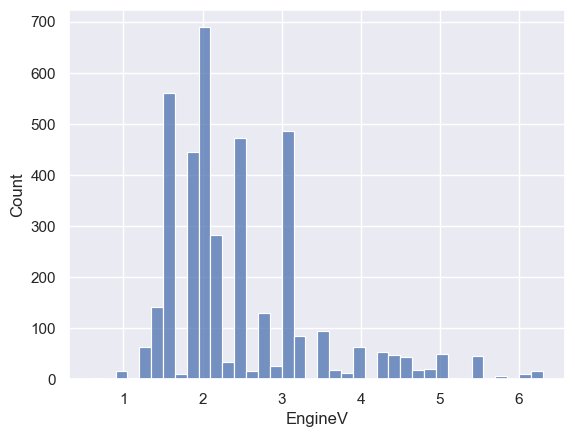

In [12]:
data2=data1[data1['EngineV']<6.5]
sns.histplot(data2['EngineV'])

In [13]:
log_price=np.log(data1['Price'])
data1['log_price']=log_price
data1.head(5)

C:\Users\elemh\AppData\Local\Temp\ipykernel_2144\2203062495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['log_price']=log_price


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [14]:
data_cleaned=data1.drop(['Price'],axis=1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


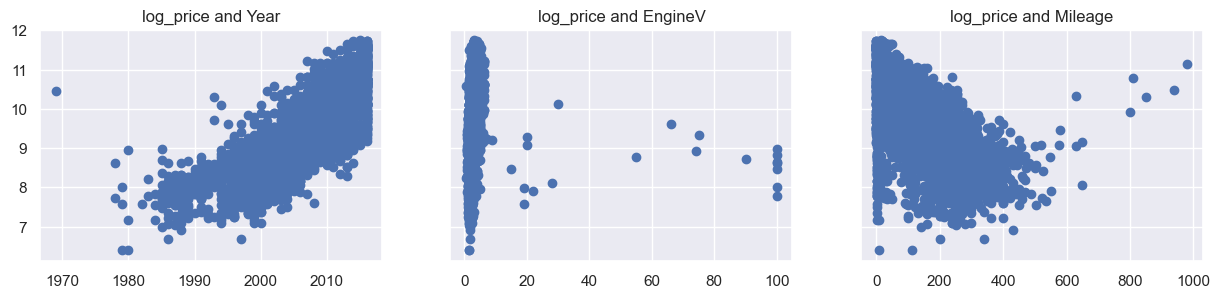

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')


plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
variables = variables.replace([np.inf, -np.inf], np.nan)
variables = variables.dropna()
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.563171,Mileage
1,3.810515,Year
2,1.307612,EngineV


In [17]:
#CREATING DUMMIES

In [18]:
data_with_dummies=pd.get_dummies(data_cleaned,drop_first=True)

In [19]:
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,1999,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,2003,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [20]:
###Regression

In [21]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [22]:
cols=[ 'log_price','Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes' ]

In [32]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed=data_preprocessed.dropna()
data_preprocessed.head()

,log_price,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1991,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,1999,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,2003,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [24]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

In [25]:
#Scaling The Data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [28]:
inputs_scaled = scaler.transform(inputs)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [30]:
#Creating The Regression

In [47]:
# Fill NaN values in x_train with column means
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Train model
reg = LinearRegression()
reg.fit(x_train_imputed, y_train)

LinearRegression()

In [49]:
y_hat = reg.predict(x_train_imputed)

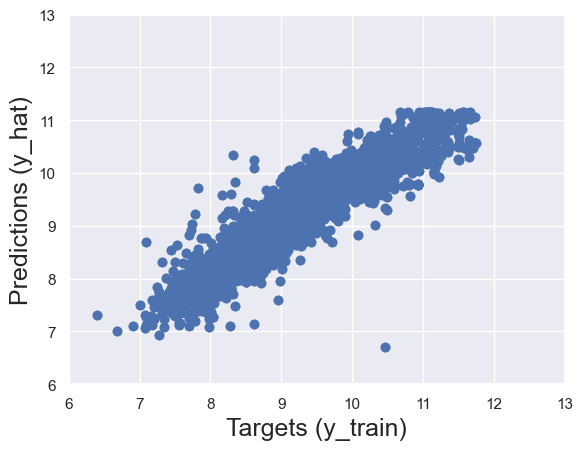

In [50]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\elemh\AppData\Local\Temp\ipykernel_2144\329104437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

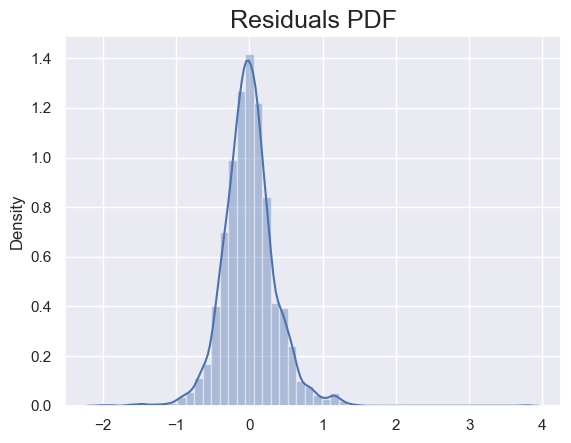

In [51]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [52]:
#Above grap leaning towards neg shows some values are overestimated

In [53]:
reg.score(x_train_imputed,y_train)

0.8411614729919924

In [54]:
#Finding Weights and Intercepts

In [56]:
reg.coef_

array([[-0.09554779,  0.01684221,  0.53024043,  0.0388422 ,  0.03258321,
        -0.1672089 , -0.24115048, -0.07712246, -0.1387739 , -0.17245867,
        -0.11728279, -0.2328447 , -0.16052529, -0.23317697, -0.02624766,
        -0.01826395, -0.03728104,  0.27120156],
       [-0.09554779,  0.01684221,  0.53024043,  0.0388422 ,  0.03258321,
        -0.1672089 , -0.24115048, -0.07712246, -0.1387739 , -0.17245867,
        -0.11728279, -0.2328447 , -0.16052529, -0.23317697, -0.02624766,
        -0.01826395, -0.03728104,  0.27120156]])

In [58]:
reg.intercept_[0]

9.371052654831706

In [70]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_[0]
reg_summary

,Features,Weights
0,Mileage,-0.095548
1,EngineV,0.016842
2,Year,0.530240
3,Brand_BMW,0.038842
4,Brand_Mercedes-Benz,0.032583
5,Brand_Mitsubishi,-0.167209
6,Brand_Renault,-0.241150
7,Brand_Toyota,-0.077122
8,Brand_Volkswagen,-0.138774
9,Body_hatch,-0.172459


In [71]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [72]:
#TESTING

In [75]:
x_test_imputed=imputer.fit_transform(x_test)
y_hat_test = reg.predict(x_test_imputed)

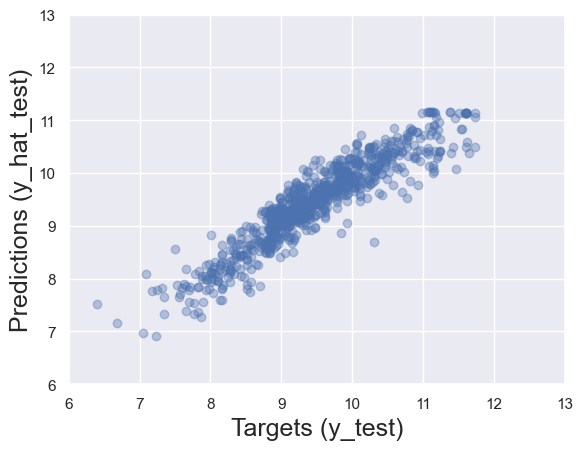

In [76]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [101]:
y_hat_modified = [row[0] for row in y_hat_test]
print(y_hat_modified[:5])

[8.951322315207547, 9.947358376795066, 10.29337223921947, 8.780890051796995, 9.00502673665983]


In [102]:
df_pf = pd.DataFrame(np.exp(y_hat_modified), columns=['Prediction'])
df_pf

,Prediction
0,7718.090865
1,20896.947545
2,29536.209763
3,6508.667647
4,8143.918543
...,...
822,8038.230994
823,16241.470402
824,16742.795516
825,20408.687780


In [108]:
df_pf['Target'] = np.exp(y_test.iloc[:, 0])
df_pf

,Prediction,Target
0,7718.090865,NaN
1,20896.947545,7900.0
2,29536.209763,NaN
3,6508.667647,NaN
4,8143.918543,NaN
...,...,...
822,8038.230994,NaN
823,16241.470402,NaN
824,16742.795516,NaN
825,20408.687780,NaN


In [113]:
y_test = y_test.reset_index(drop=True)
y_test.iloc[:, 0]

0       8.839277
1      10.265131
2      10.325482
3       8.699515
4       8.948846
         ...    
822     9.104980
823     9.609116
824     9.711116
825     9.942708
826    11.446305
Name: log_price, Length: 827, dtype: float64

In [115]:
df_pf['Target'] = np.exp(y_test.iloc[:, 0])
df_pf

,Prediction,Target
0,7718.090865,6900.00
1,20896.947545,28713.75
2,29536.209763,30500.00
3,6508.667647,6000.00
4,8143.918543,7699.00
...,...,...
822,8038.230994,9000.00
823,16241.470402,14900.00
824,16742.795516,16500.00
825,20408.687780,20800.00


In [116]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [117]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,7718.090865,6900.00,-818.090865,11.856389
1,20896.947545,28713.75,7816.802455,27.223203
2,29536.209763,30500.00,963.790237,3.159968
3,6508.667647,6000.00,-508.667647,8.477794
4,8143.918543,7699.00,-444.918543,5.778913
...,...,...,...,...
822,8038.230994,9000.00,961.769006,10.686322
823,16241.470402,14900.00,-1341.470402,9.003157
824,16742.795516,16500.00,-242.795516,1.471488
825,20408.687780,20800.00,391.312220,1.881309


In [118]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,827.000000,827.000000,827.000000,827.000000
mean,17049.543042,19727.852394,2678.309352,24.883339
std,13803.345965,21160.098689,11658.764335,22.905353
min,1011.809632,600.000000,-20289.218782,0.042517
25%,8127.569079,7500.000000,-1916.143428,8.514628
50%,13236.485194,12000.000000,26.839897,18.885748
75%,22302.975219,22900.000000,2379.077183,35.701926
max,70147.855434,125000.000000,89086.666828,208.758892


In [121]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])
df_pf.head()

,Prediction,Target,Residual,Difference%
0,7718.09,6900.00,-818.09,11.86
1,20896.95,28713.75,7816.80,27.22
2,29536.21,30500.00,963.79,3.16
3,6508.67,6000.00,-508.67,8.48
4,8143.92,7699.00,-444.92,5.78


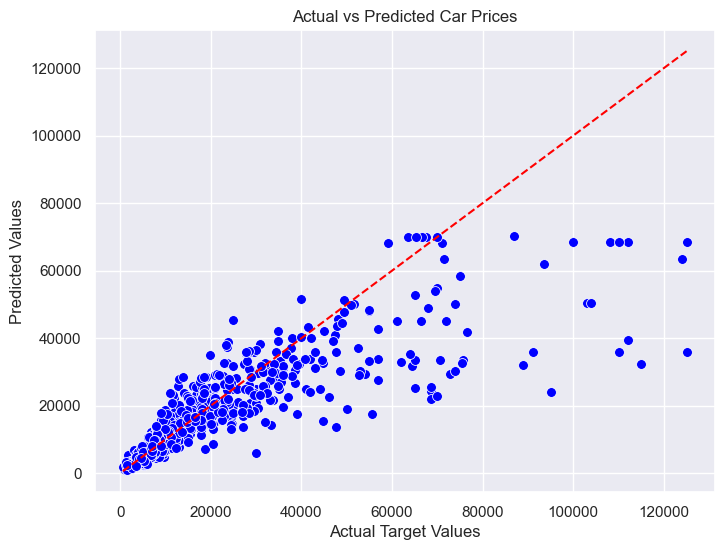

In [120]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pf['Target'], y=df_pf['Prediction'], color='blue', s=50)
plt.plot([df_pf['Target'].min(), df_pf['Target'].max()],
         [df_pf['Target'].min(), df_pf['Target'].max()],
         color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()